In [1]:
BEIJING, CHANGCHUN, WULUMUQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN WULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [2]:
dictionary = {}

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    WULUMUQI: [BEIJING], 
    BEIJING: [WULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
graph = connection

In [7]:
g = nx.Graph(graph)

C:\Users\zzy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


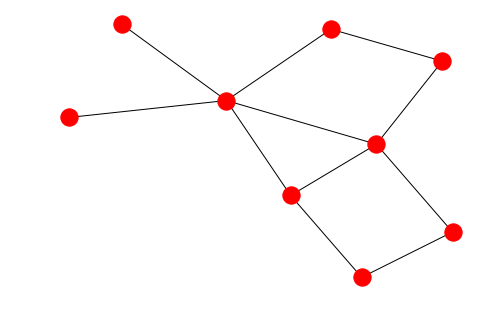

In [8]:
nx.draw(g)

In [9]:
G = nx.Graph()

In [10]:
G.add_node('a')

In [11]:
print(G.nodes)

['a']


In [12]:
print(g.nodes)

['CHANGCHUN', 'WULUMUQI', 'BEIJING', 'NEWYORK', 'SHANGHAI', 'WUHAN', 'GUANGZHOU', 'SHENZHEN', 'BANGKOK']


In [13]:
G = nx.Graph() # new graph

H=nx.path_graph(10) # add 10 new nodes
G.add_nodes_from(H)
print(G.nodes()) # print nodes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[(1, 2)]


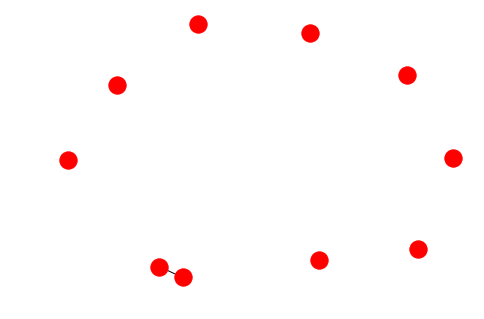

In [14]:
G.add_edge(1,2) # add a new edge
print(G.edges()) # print edges
nx.draw(G)

In [15]:
print(g.edges())

[('CHANGCHUN', 'BEIJING'), ('WULUMUQI', 'BEIJING'), ('BEIJING', 'WUHAN'), ('BEIJING', 'SHENZHEN'), ('BEIJING', 'NEWYORK'), ('NEWYORK', 'SHANGHAI'), ('SHANGHAI', 'WUHAN'), ('WUHAN', 'GUANGZHOU'), ('WUHAN', 'SHENZHEN'), ('GUANGZHOU', 'BANGKOK'), ('SHENZHEN', 'BANGKOK')]


In [16]:
def nagivator(start, destination, connection_graph):   #新来的点优先拓展
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)     #先取路径
        frontier = path[-1]    #再取点
        
        if frontier in seen:
            continue
        
        successors = connection_graph[frontier]

        for s in successors:
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])

        seen.add(frontier)
        pathes  = sorted(pathes, key = len)  #把最短的放在前面
#         return seen

In [68]:
nagivator(CHANGCHUN, BANGKOK, connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [23]:
def draw_route(routes):
    print('->'.join(routes))

In [24]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

CHANGCHUN->BEIJING->SHENZHEN->BANGKOK


In [57]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start]
    seen = set()
    
    while pathes:
        frontier = pathes.pop(0)
        
        if frontier in seen:
            continue
        
        successors = connection_graph[frontier]
        print('I am standing at {}, Looking forward{}'.format(frontier, successors))
        pathes = pathes + successors  # 往后插入
        
        seen.add(frontier)

In [58]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start]
    seen = set()
    
    while pathes:
        frontier = pathes.pop(0)
        
        if frontier in seen:
            continue
        
        successors = connection_graph[frontier]
        print('I am standing at {}, Looking forward{}'.format(frontier, successors))
        pathes = successors + pathes   #往前插入
        
        seen.add(frontier)

In [59]:
connection_2 = {
    0:[1, 5],
    1:[0, 2],
    2:[1, 3],
    3:[2, 4],
    4:[3],
    5:[0, 6],
    6:[5, 7],
    7:[6]
}

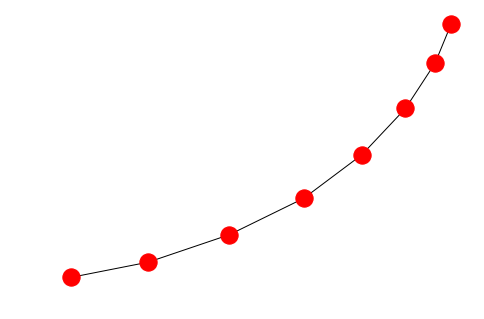

In [60]:
nx.draw(nx.Graph(connection_2))

In [61]:
nagivator_dfs(0, 7, connection_2)

I am standing at 0, Looking forward[1, 5]
I am standing at 1, Looking forward[0, 2]
I am standing at 2, Looking forward[1, 3]
I am standing at 3, Looking forward[2, 4]
I am standing at 4, Looking forward[3]
I am standing at 5, Looking forward[0, 6]
I am standing at 6, Looking forward[5, 7]
I am standing at 7, Looking forward[6]


In [62]:
nagivator_bfs(0, 7, connection_2)

I am standing at 0, Looking forward[1, 5]
I am standing at 1, Looking forward[0, 2]
I am standing at 5, Looking forward[0, 6]
I am standing at 2, Looking forward[1, 3]
I am standing at 6, Looking forward[5, 7]
I am standing at 3, Looking forward[2, 4]
I am standing at 7, Looking forward[6]
I am standing at 4, Looking forward[3]


 ##Sentence Generation

In [2]:
grammer = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [ ]:
grammer = """
stmet = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [99]:
decimal_grammer = """
expresion = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [3]:
import random

In [27]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {} 
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
            
        target, rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [47]:
a = "noun => 女人 | 篮球 | 桌子 | 小猫"
b = a.strip().split('=>')
print(c.split('|'))
print(c.split('|')[0].split())
print([r.strip() for r in c.split('|')])

[' 女人 ', ' 篮球 ', ' 桌子 ', ' 小猫']
['女人']
['女人', '篮球', '桌子', '小猫']


In [39]:
parse_grammar(grammer)

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [5]:
def adj(): return random.choice(["蓝色的", "好看的", "小小的"])

In [6]:
adj()

'好看的'

In [7]:
def noun(): return random.choice("女人 | 篮球 | 桌子 | 小猫".split("|"))

In [8]:
noun()

' 篮球 '

In [48]:
g = parse_grammar(grammer)

In [50]:
random.choice(g['Adj*'])

['null']

In [61]:
def gene(grammer_parsed, target = 'sentence'):
    if target not in grammer_parsed: return target  #递归出口
    rules = random.choice(grammer_parsed[target])
    return ''.join(gene(grammer_parsed, target = r) for r in rules if r != 'null')

In [65]:
gene(g)

'这个桌子坐在这个篮球'

In [115]:
gene(parse_grammar(decimal_grammer, '='), target = 'expresion')

'1*4/8*204'